Otsu's threshold value is 89.0
Number of local maxima found are 9


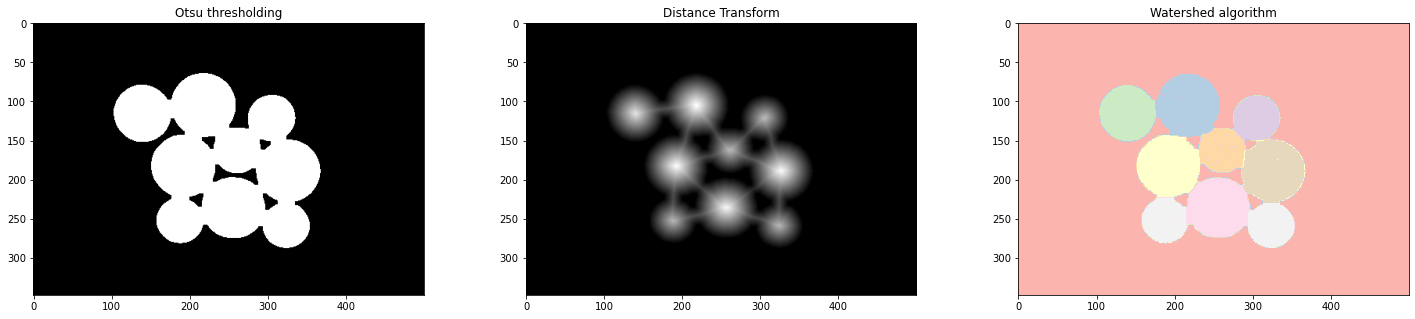

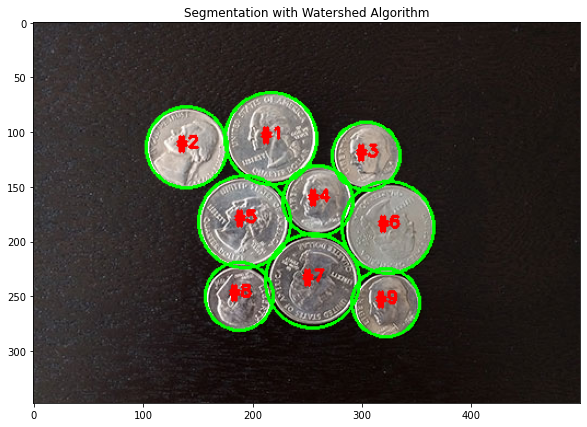

In [17]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage as ndi
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/watershed.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),3)

#2nd method Apply Otsu thresholding algorithm
(Tvalue, threshOtsu) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Otsu's threshold value is {}".format(Tvalue))

#Apply morphological transformation for Otsu thresholding
RE33 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) #create structural element rectangle 5x5
threshOtsu = cv2.morphologyEx(threshOtsu, cv2.MORPH_CLOSE, RE33)

#Apply distance transform algorithm
dist_transform = cv2.distanceTransform(threshOtsu, cv2.DIST_L2, 5)

#Find local maxima
local_max = peak_local_max(dist_transform, min_distance=20, indices=False)

#Labeling the local maxima
s = np.ones((3,3))
(markers, features) = ndi.label(local_max, structure=s)
print('Number of local maxima found are {}'.format(features))

#Apply Watershed algorithm
segments = watershed(-dist_transform, markers, mask=threshOtsu)

#Show image
fig1 = plt.figure(figsize=(25,5))
ax1 = fig1.add_subplot(1,3,1)
ax1.set_title('Otsu thresholding')
ax1.imshow(threshOtsu, cmap='gray')
ax2 = fig1.add_subplot(1,3,2)
ax2.set_title('Distance Transform')
ax2.imshow(dist_transform, cmap='gray')
ax2 = fig1.add_subplot(1,3,3)
ax2.set_title('Watershed algorithm')
ax2.imshow(segments, cmap='Pastel1')


#Loop over the unique labels returned by the Watershed algorithm
for segment in np.unique(segments):
    if segment == 0:
        continue
    mask = np.zeros(threshOtsu.shape, dtype='uint8')
    mask[segments == segment] = 255
    (cnt, _) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnt, key=cv2.contourArea)
    ((cX,cY), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX),int(cY)), int(r), (0,255,0), 2)
    cv2.putText(image, "#{}".format(segment), (int(cX)-10, int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

#Show image
fig2 = plt.figure(figsize=(10,7))
ax1 = fig2.add_subplot(1,1,1)
ax1.set_title('Segmentation with Watershed Algorithm')
ax1.imshow(image)
    
    